<a href="https://colab.research.google.com/github/emrecicekyurt/TensorFlowTutorialProjects/blob/main/CNN_BinaryClassificationwithTensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Get the data

import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#unzipping the downloaded data

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close() 

--2022-06-23 11:58:26--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.128.128, 142.251.6.128, 142.250.152.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.128.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   208MB/s    in 0.5s    

2022-06-23 11:58:26 (208 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [3]:
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train

pizza  steak


In [5]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [6]:
import os 

#walk through the directory and list the numbers of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 0 directories and 250 images in pizza_steak/test/steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 0 directories and 750 images in pizza_steak/train/steak


In [7]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Jun 23 11:58 .
drwxr-xr-x 1 root root 4096 Jun 23 11:58 ..
drwxr-xr-x 4 root root 4096 Jun 23 11:58 test
drwxr-xr-x 4 root root 4096 Jun 23 11:58 train


In [8]:
# Alternative way to see how many images we do have 

num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

Lets get the class names first then visualize the images that we have

In [9]:
# Get the class names programatically
import pathlib 
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # creating a list of class names from subdirectory 
print(class_names)

['pizza' 'steak']


In [10]:
# Lets visualize the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # setting up the image directory
  target_folder = target_dir + target_class

  #get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  #read image and plotting it
  img = mpimg.imread(target_folder + "/" + random_image[0] )
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")
  
  return img

Image shape: (512, 512, 3)


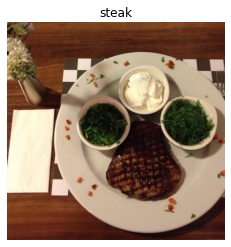

In [11]:
# viewving a random image 

img = view_random_image(target_dir = "pizza_steak/train/",
                        target_class = "steak") # or we can write pizza instead of steak to see pizza examples

In [12]:
import tensorflow as tf

tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[174, 133, 101],
        [119,  78,  46],
        [113,  70,  36],
        ...,
        [107,  51,  26],
        [108,  52,  27],
        [110,  54,  29]],

       [[173, 134, 101],
        [136,  97,  64],
        [123,  82,  50],
        ...,
        [105,  49,  24],
        [103,  47,  22],
        [103,  47,  22]],

       [[144, 107,  78],
        [123,  86,  57],
        [110,  71,  42],
        ...,
        [109,  53,  28],
        [108,  52,  27],
        [110,  54,  29]],

       ...,

       [[ 88,  25,  18],
        [ 92,  29,  22],
        [ 90,  27,  20],
        ...,
        [ 64,  26,  25],
        [ 60,  22,  21],
        [ 56,  18,  17]],

       [[ 83,  20,  13],
        [ 84,  21,  14],
        [ 85,  22,  15],
        ...,
        [ 89,  54,  52],
        [ 85,  49,  49],
        [ 82,  46,  46]],

       [[ 95,  32,  25],
        [ 90,  27,  20],
        [ 90,  27,  20],
        ...,
        [ 85,  49,  4

In [13]:
img.shape #(width, height, colour channels)

(512, 512, 3)

In [14]:
# Lets start and end-end example for CNN

from tensorflow.keras.preprocessing.image import ImageDataGenerator

#set seed 
tf.random.set_seed(42)

#preprocessing the data
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

#setup paths to our directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# data transfer from directories to batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size= 32,
                                               target_size= (224,224),
                                               class_mode = "binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               seed = 42)

#Building a CNN model
model_1 = tf.keras.Sequential([
        tf.keras.layers.Conv2D(filters = 10,
                               kernel_size = 3,
                               activation = "relu",
                               input_shape = (224,224,3)),
        tf.keras.layers.Conv2D(10,3,activation = "relu"),
        tf.keras.layers.MaxPool2D(pool_size =2,
                                  padding = "valid"),
        tf.keras.layers.Conv2D(10,3,activation ="relu",),
        tf.keras.layers.Conv2D(10,3,activation ="relu",),
        tf.keras.layers.MaxPool2D(2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1, activation = "sigmoid")

])

# Compile the model

model_1.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps= len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 23s 213ms/step - loss: 0.5681 - accuracy: 0.6967 - val_loss: 0.4000 - val_accuracy: 0.8120
Epoch 2/5
47/47 [==============================] - 10s 214ms/step - loss: 0.4117 - accuracy: 0.8107 - val_loss: 0.3226 - val_accuracy: 0.8660
Epoch 3/5
47/47 [==============================] - 9s 199ms/step - loss: 0.3885 - accuracy: 0.8353 - val_loss: 0.3496 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 9s 196ms/step - loss: 0.3393 - accuracy: 0.8560 - val_loss: 0.3043 - val_accuracy: 0.8700
Epoch 5/5
47/47 [==============================] - 10s 222ms/step - loss: 0.2972 - accuracy: 0.8793 - val_loss: 0.3377 - val_accuracy: 0.8620


In [15]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

#Binary Classification

1. Become one with data
2. Preprocess the data
3. Create the model
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model
7. Repeat steps until satisfied



###1. Become one with the data

Image shape: (512, 512, 3)
Image shape: (382, 512, 3)


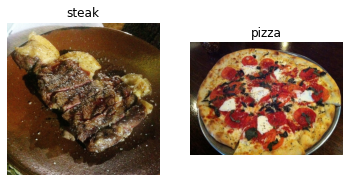

In [16]:
# randomly visualize the data
plt.figure()
plt.subplot(1,2,1)
steak_image = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_image = view_random_image("pizza_steak/train/", "pizza")

#Note that image shapes are not same always, therefore we will reshape them (we already did with the previous model)

###2. Preprocessing the data

In [17]:
# Note that the data is already splittid to test and train datasets.

#define directory paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [18]:
!nvidia-smi

Thu Jun 23 11:59:47 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P0    26W /  70W |   2328MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [19]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [20]:
# data transfer from directories to batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size= 32,
                                               target_size= (224,224),
                                               class_mode = "binary",
                                               seed=42)
test_data = test_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               seed = 42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [21]:
# Get a sample of a train data batch 

images, labels = train_data.next() # It gets the "next" batch of images/labels in training data
len(images), len(labels)

(32, 32)

In [22]:
# How many batches we do have
len(train_data) # It comes from 1500/32

47

In [23]:
images[4].shape


(224, 224, 3)

In [24]:
labels

array([1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.],
      dtype=float32)

### 3. Creatin CNN model

In [25]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [26]:
# a baseline simple model
model_2 = Sequential([
      Conv2D(filters=10,
             kernel_size = 3,
             strides=1,
             padding= 'valid',
             activation="relu",
             input_shape = (224,224,3)),
      Conv2D(10,3,activation = "relu"),
      Conv2D(10,3,activation = "relu"),
      Flatten(),
      Dense(1, activation="sigmoid")
])

In [27]:
# compile the model
model_2.compile(loss = "binary_crossentropy",
                optimizer= Adam(),
                metrics = ["accuracy"])

In [28]:
model_2.summary()
# here we have a lot parameteers since we dont have maxpool layeers

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 475240)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


###4. Fit the model

In [29]:
#fit the model
history_2 = model_2.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data= test_data,
                        validation_steps= len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 203ms/step - loss: 1.1051 - accuracy: 0.6800 - val_loss: 0.4428 - val_accuracy: 0.8040
Epoch 2/5
47/47 [==============================] - 9s 200ms/step - loss: 0.4386 - accuracy: 0.8133 - val_loss: 0.3873 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 9s 202ms/step - loss: 0.3520 - accuracy: 0.8580 - val_loss: 0.3907 - val_accuracy: 0.8260
Epoch 4/5
47/47 [==============================] - 9s 200ms/step - loss: 0.2515 - accuracy: 0.9100 - val_loss: 0.3715 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 9s 195ms/step - loss: 0.1101 - accuracy: 0.9667 - val_loss: 0.4070 - val_accuracy: 0.8120


In [30]:
model_1.evaluate(test_data)
# previous model was better but we will improve the baseline model (model_2)

16/16 [==============================] - 2s 133ms/step - loss: 0.3377 - accuracy: 0.8620


[0.3376716077327728, 0.8619999885559082]

###5. Evaluating Model

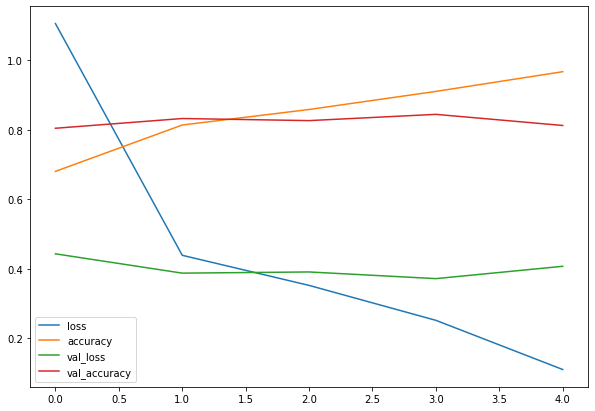

In [31]:
import pandas as pd
pd.DataFrame(history_2.history).plot(figsize = (10,7))

In [32]:
# Plotting the curves separately to make them more clear

def plot_loss_curves(history):

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  #plot loss
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #plot accuracy
  plt.figure() 
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()  



Validation loss starts to increase means that the model is **overfitting** on the training dataset. 

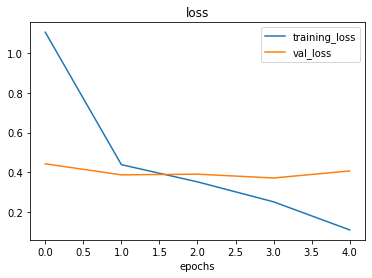

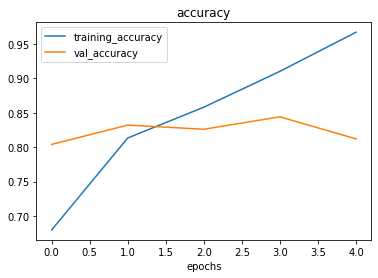

In [33]:
plot_loss_curves(history_2)

###6. Adjust the model paramters

Fitting a machine learning model comes in 3 steps:

1. Create a baseline
2. Beat the baseline by overfitting a larger model
3. Reduce overfitting

Ways to induce overfitting:
* Increase the number of conv layers
* Increase the filter of conv layers
* Add another Dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (eg. MaxPool2D)
* Add more data

In [34]:
# Create the model (new baseline)

model_3 = Sequential([
      Conv2D(10, 3, activation= "relu", input_shape = (224,224,3)),
      MaxPool2D(pool_size=2),
      Conv2D(10, 3, activation ="relu"),
      MaxPool2D(),
      Conv2D(10,3, activation = "relu"),
      MaxPool2D(),
      Flatten(),
      Dense(1, activation = "sigmoid")
])

In [35]:
# Compile the model

model_3.compile(loss="binary_crossentropy",
                optimizer= Adam(),
                metrics = ["accuracy"])


In [36]:
# Fit the model

history_3 = model_3.fit(train_data,
                        epochs= 5,
                        steps_per_epoch = len(train_data),
                        validation_data= test_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 196ms/step - loss: 0.6355 - accuracy: 0.6473 - val_loss: 0.5067 - val_accuracy: 0.7620
Epoch 2/5
47/47 [==============================] - 9s 194ms/step - loss: 0.4844 - accuracy: 0.7840 - val_loss: 0.4065 - val_accuracy: 0.7940
Epoch 3/5
47/47 [==============================] - 9s 191ms/step - loss: 0.4408 - accuracy: 0.8067 - val_loss: 0.3812 - val_accuracy: 0.8200
Epoch 4/5
47/47 [==============================] - 9s 195ms/step - loss: 0.4129 - accuracy: 0.8207 - val_loss: 0.4223 - val_accuracy: 0.8060
Epoch 5/5
47/47 [==============================] - 9s 195ms/step - loss: 0.4089 - accuracy: 0.8260 - val_loss: 0.3856 - val_accuracy: 0.8280


In [37]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

Look at the shapes at maxpooling layers they are half of previous (the important features taken) !
We beated the previous model that is the power of maxpooing and there is a big difference at the parameters that is been used in the model!

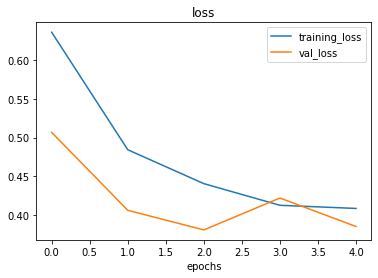

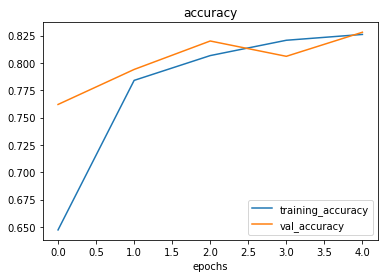

In [38]:
# Lets plot the loss curves for the model_3

plot_loss_curves(history_3)

In [39]:
# Reducing overfitting (regularization) also can be done with data augmentation

# Create ImageDataGenerator training with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale= 1/255.,
                                             rotation_range =0.2,
                                             shear_range = 0.2,
                                             zoom_range = 0.2,
                                             width_shift_range= 0.2,
                                             height_shift_range = 0.2,
                                             horizontal_flip = True)

# Create ImageDataGenerator training wihout data augmentation
train_datagen = ImageDataGenerator(rescale = 1/255.)

# Create ImageDataGenerator wihout data augmentation for test dataset
test_datagen = ImageDataGenerator(rescale = 1/255.)



In [40]:
# Import data and augment it from training directory

print("Augmented training data")
train_data_augmented= train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size = (224,224),
                                                                  batch_size = 32,
                                                                  class_mode = "binary",
                                                                  shuffle=False)

#Create non augmented train data batches
print("Non augmented trainin data")
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size= 32,
                                               target_size= (224,224),
                                               class_mode = "binary",
                                               shuffle = False)

#Create non aumented test data batches
print("Non augmented test data")
test_data = test_datagen.flow_from_directory(directory = test_dir,
                                               batch_size= 32,
                                               target_size= (224,224),
                                               class_mode = "binary")

Augmented training data
Found 1500 images belonging to 2 classes.
Non augmented trainin data
Found 1500 images belonging to 2 classes.
Non augmented test data
Found 500 images belonging to 2 classes.


Data augmentation is usually only performmed on training data !!!!

In [41]:
# Getting sample data batches 

images, labels = train_data.next()
augmented_images, augmented_labels =train_data_augmented.next()

 Showing image num: 28


(-0.5, 223.5, 223.5, -0.5)

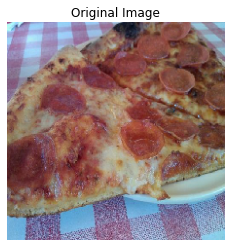

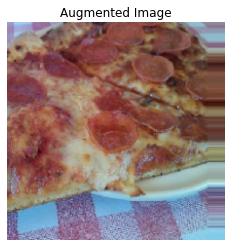

In [42]:
# Lets see an original image and augmented image randomly

import random
random_number = random.randint(0,32)
print(f" Showing image num: {random_number}")
plt.imshow(images[random_number])
plt.title("Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Augmented Image")
plt.axis(False)

Lets build a model with augmented training dataaaa


In [43]:
# Create a model (same as model 3)

model_4  =Sequential([
        Conv2D(10, 3, activation = "relu"),
        MaxPool2D(pool_size = 2),
        Conv2D(10, 3, activation = "relu"),
        MaxPool2D(),
        Conv2D(10, 3, activation = "relu"),
        MaxPool2D(),
        Flatten(),
        Dense(1, activation= "sigmoid")

])

# Compile model
model_4.compile(loss= "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

# Fit the model
history_4=model_4.fit(train_data_augmented,
                     epochs = 5,
                      steps_per_epoch =  len(train_data_augmented),
                      validation_data = test_data,
                      validation_steps = len(test_data) )

Epoch 1/5
47/47 [==============================] - 24s 508ms/step - loss: 0.7218 - accuracy: 0.4667 - val_loss: 0.6845 - val_accuracy: 0.5900
Epoch 2/5
47/47 [==============================] - 22s 476ms/step - loss: 0.6989 - accuracy: 0.5007 - val_loss: 0.6795 - val_accuracy: 0.5360
Epoch 3/5
47/47 [==============================] - 22s 473ms/step - loss: 0.6876 - accuracy: 0.5680 - val_loss: 0.6634 - val_accuracy: 0.6360
Epoch 4/5
47/47 [==============================] - 22s 471ms/step - loss: 0.6856 - accuracy: 0.5520 - val_loss: 0.6546 - val_accuracy: 0.5240
Epoch 5/5
47/47 [==============================] - 22s 469ms/step - loss: 0.6801 - accuracy: 0.5880 - val_loss: 0.6111 - val_accuracy: 0.7760


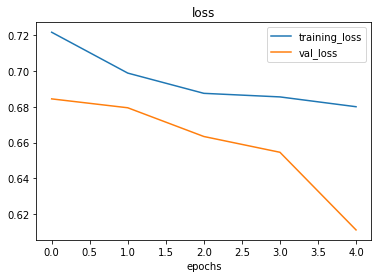

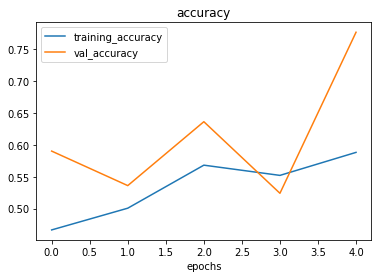

In [44]:
# chechin the training model curves
plot_loss_curves(history_4)

In [45]:
# What if we use shuffled augmented data ?
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size = (224,224),
                                                                            class_mode = "binary",
                                                                            batch_size = 32,
                                                                            shuffle = True)

Found 1500 images belonging to 2 classes.


In [46]:
# Create a model (same as model 3 and 4 with another data)

model_5  =Sequential([
        Conv2D(10, 3, activation = "relu"),
        MaxPool2D(pool_size = 2),
        Conv2D(10, 3, activation = "relu"),
        MaxPool2D(),
        Conv2D(10, 3, activation = "relu"),
        MaxPool2D(),
        Flatten(),
        Dense(1, activation= "sigmoid")

])

# Compile model
model_5.compile(loss= "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

# Fit the model
history_5=model_5.fit(train_data_augmented_shuffled,
                     epochs = 5,
                      steps_per_epoch =  len(train_data_augmented),
                      validation_data = test_data,
                      validation_steps = len(test_data) )

Epoch 1/5
47/47 [==============================] - 23s 473ms/step - loss: 0.6515 - accuracy: 0.6233 - val_loss: 0.5555 - val_accuracy: 0.7120
Epoch 2/5
47/47 [==============================] - 22s 470ms/step - loss: 0.5860 - accuracy: 0.6960 - val_loss: 0.4807 - val_accuracy: 0.7720
Epoch 3/5
47/47 [==============================] - 22s 476ms/step - loss: 0.5421 - accuracy: 0.7173 - val_loss: 0.3932 - val_accuracy: 0.8260
Epoch 4/5
47/47 [==============================] - 23s 482ms/step - loss: 0.4814 - accuracy: 0.7693 - val_loss: 0.3966 - val_accuracy: 0.8200
Epoch 5/5
47/47 [==============================] - 23s 488ms/step - loss: 0.4687 - accuracy: 0.7787 - val_loss: 0.3519 - val_accuracy: 0.8500


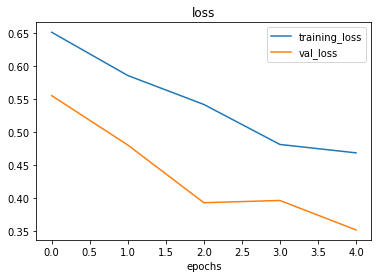

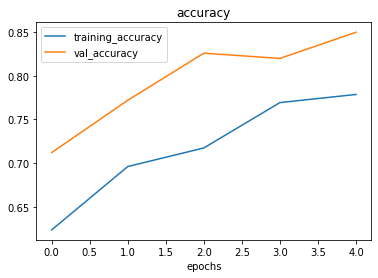

In [47]:
plot_loss_curves(history_5)

###7. Repeat until satisfied

We beated our baseline model. There are a few things that may improve the model:

* Increase the number of model layers.
* Increase the number of filters in each convolutional layer (e.gg 10 -> 32 or 64)
* Train for longer (more epochs) 
* Find an ideal learning rate
* Get more data 
* Use **transfer learning**


In [48]:
# Lets increase the number of filters of the model and create a new model

# Create a model (same as model 5 with increased filters)

model_6  =Sequential([
        Conv2D(32, 3, activation = "relu"),
        MaxPool2D(pool_size = 2),
        Conv2D(32, 3, activation = "relu"),
        MaxPool2D(),
        Conv2D(32, 3, activation = "relu"),
        MaxPool2D(),
        Flatten(),
        Dense(1, activation= "sigmoid")

])

# Compile model
model_6.compile(loss= "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

# Fit the model
history_6=model_6.fit(train_data_augmented_shuffled,
                     epochs = 5,
                      steps_per_epoch =  len(train_data_augmented),
                      validation_data = test_data,
                      validation_steps = len(test_data) )

Epoch 1/5
47/47 [==============================] - 23s 481ms/step - loss: 0.6289 - accuracy: 0.6387 - val_loss: 0.4343 - val_accuracy: 0.8060
Epoch 2/5
47/47 [==============================] - 22s 477ms/step - loss: 0.4987 - accuracy: 0.7753 - val_loss: 0.3595 - val_accuracy: 0.8640
Epoch 3/5
47/47 [==============================] - 24s 502ms/step - loss: 0.4886 - accuracy: 0.7767 - val_loss: 0.4723 - val_accuracy: 0.7900
Epoch 4/5
47/47 [==============================] - 23s 493ms/step - loss: 0.4585 - accuracy: 0.7900 - val_loss: 0.4918 - val_accuracy: 0.7720
Epoch 5/5
47/47 [==============================] - 23s 488ms/step - loss: 0.4565 - accuracy: 0.7940 - val_loss: 0.3518 - val_accuracy: 0.8440


Lets make prediction on a custom data


(-0.5, 3023.5, 4031.5, -0.5)

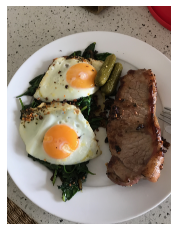

In [54]:
#view the image
import matplotlib.image as mpimg
#https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
# download the image and load to colab
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [55]:
steak.shape #large image

(4032, 3024, 3)

In [56]:
# cReating a function that preprocess the custom data "steak"

def load_and_prep_image(filename, img_shape = 224):
  img = tf.io.read_file(filename) #read image
  img = tf.image.decode_image(img) # decode the image to a tensor
  img = tf.image.resize(img, size = [img_shape, img_shape]) # resize the image
  img = img/255. # rescale the image
  return img


In [57]:
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [81]:
pred = model_6.predict(tf.expand_dims(steak, axis=0))


1

In [63]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [84]:
predicted_class = class_names[int(tf.round(pred))]
predicted_class

'steak'

In [85]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

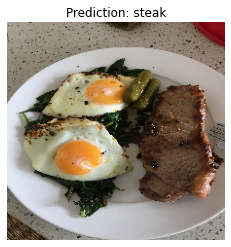

In [86]:
# Test our model on a custom image
pred_and_plot(model_6, "03-steak.jpeg", class_names)